In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sp

In [2]:
#data from: https://www.kaggle.com/noriuk/us-education-datasets-unification-project
#read in the data

edfin = pd.read_csv('desktop/p_2_data/finance_districts.csv')

edfin.head()

,STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
0,ALABAMA,9609.0,AUTAUGA COUNTY SCHOOL DISTRICT,2016,80867,7447,53842,19578,76672,43843,23941,6401.0,1506
1,ALABAMA,30931.0,BALDWIN COUNTY SCHOOL DISTRICT,2016,338236,23710,145180,169346,299880,164977,97231,19439.0,9749
2,ALABAMA,912.0,BARBOUR COUNTY SCHOOL DISTRICT,2016,10116,2342,5434,2340,10070,4907,3896,975.0,110
3,ALABAMA,2842.0,EUFAULA CITY SCHOOL DISTRICT,2016,26182,3558,15900,6724,29843,15302,7901,2274.0,4133
4,ALABAMA,3322.0,BIBB COUNTY SCHOOL DISTRICT,2016,32486,3664,21846,6976,31662,16407,11087,3122.0,486


In [3]:
#pull out the michigan data specifically

mi_edfin = edfin[edfin['STATE'] == 'MICHIGAN']

print(f'there are {len(mi_edfin)} rows in the dataframe')
mi_edfin.head()

there are 17260 rows in the dataframe


,STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
5270,MICHIGAN,732.0,ALCONA COMM SCHS,2016,8100,281,1274,6545,7432,4633,2653,0.0,114
5271,MICHIGAN,31.0,AUTRAIN PUBLIC SCHS,2016,1007,66,100,841,982,504,357,52.0,45
5272,MICHIGAN,25.0,BURT TWP SCH DIST,2016,961,35,268,658,916,435,389,61.0,17
5273,MICHIGAN,673.0,MUNISING CITY SCH DIST 3,2016,7728,471,4286,2971,7269,4223,2325,462.0,174
5274,MICHIGAN,352.0,SUPERIOR CENTRAL SCHOOL DIST,2016,4158,217,2463,1478,4194,2150,1291,178.0,524


In [4]:
#get descriptive stats
mi_edfin.describe()

,ENROLL,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
count,16644.000000,17260.000000,1.726000e+04,17260.000000,1.726000e+04,17260.000000,1.726000e+04,17260.000000,17260.000000,16644.000000,17260.000000
mean,2299.193764,2003.830417,2.444538e+04,1926.994612,1.349688e+04,9021.508111,2.466142e+04,11728.414658,7869.352317,1175.120404,2073.277231
std,5960.513603,6.874685,6.023784e+04,9544.126848,3.789383e+04,19011.649008,6.316617e+04,31230.515907,21369.069105,2789.451442,7394.963657
min,0.000000,1992.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,362.000000,1998.000000,4.864000e+03,232.750000,2.373750e+03,1280.000000,4.848500e+03,2197.000000,1576.000000,164.000000,100.000000
50%,1200.500000,2004.000000,1.154600e+04,561.000000,6.546000e+03,3396.000000,1.162800e+04,5722.500000,3490.000000,523.000000,363.000000
75%,2632.000000,2009.000000,2.526250e+04,1360.000000,1.448700e+04,8711.500000,2.576125e+04,12109.000000,7873.000000,1260.000000,1312.000000
max,182316.000000,2016.000000,1.671978e+06,451471.000000,1.200905e+06,334981.000000,2.021123e+06,957304.000000,661810.000000,77045.000000,363583.000000


In [5]:
#pare data down to the most recent date values

mi_fin_2016 = mi_edfin[mi_edfin['YRDATA'] == 2016]

print(f'there are {len(mi_fin_2016)} rows in the dataframe')
mi_fin_2016.head()

there are 599 rows in the dataframe


,STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
5270,MICHIGAN,732.0,ALCONA COMM SCHS,2016,8100,281,1274,6545,7432,4633,2653,0.0,114
5271,MICHIGAN,31.0,AUTRAIN PUBLIC SCHS,2016,1007,66,100,841,982,504,357,52.0,45
5272,MICHIGAN,25.0,BURT TWP SCH DIST,2016,961,35,268,658,916,435,389,61.0,17
5273,MICHIGAN,673.0,MUNISING CITY SCH DIST 3,2016,7728,471,4286,2971,7269,4223,2325,462.0,174
5274,MICHIGAN,352.0,SUPERIOR CENTRAL SCHOOL DIST,2016,4158,217,2463,1478,4194,2150,1291,178.0,524


In [6]:
#get descriptive stats

mi_fin_2016.describe()

,ENROLL,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
count,599.000000,599.0,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,2229.904841,2016.0,32414.125209,2592.360601,17909.490818,11912.273790,30052.495826,15214.472454,9848.242070,1415.435726,1774.353923
std,3463.101376,0.0,54037.882972,9449.040267,28292.814705,21406.956457,49252.793301,23302.616485,18757.978841,2625.975213,4262.970926
min,0.000000,2016.0,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000
25%,477.500000,2016.0,8356.500000,446.000000,4386.000000,2509.500000,7856.000000,4111.500000,2352.500000,326.000000,127.000000
50%,1241.000000,2016.0,16499.000000,921.000000,9779.000000,5318.000000,16005.000000,8336.000000,4863.000000,760.000000,415.000000
75%,2752.500000,2016.0,34216.000000,1931.500000,21480.000000,11871.000000,33404.000000,17221.500000,10708.000000,1559.500000,1322.000000
max,46616.000000,2016.0,838553.000000,193905.000000,430745.000000,213903.000000,807406.000000,303011.000000,348266.000000,49426.000000,49727.000000


In [7]:
#look at datatypes 

mi_fin_2016.dtypes

STATE        object
ENROLL      float64
NAME         object
YRDATA        int64
TOTALREV      int64
TFEDREV       int64
TSTREV        int64
TLOCREV       int64
TOTALEXP      int64
TCURINST      int64
TCURSSVC      int64
TCURONON    float64
TCAPOUT       int64
dtype: object

In [8]:
#remove districts with an enrollment of zero

mi_fin_2016 = mi_fin_2016[mi_fin_2016['ENROLL'] != 0]



#compute revenue per student

#send rows of interest to numpy arrays for manipulation

enrol = mi_fin_2016['ENROLL'].to_numpy()

trev = mi_fin_2016['TOTALREV'].to_numpy()

tfed_rev = mi_fin_2016['TFEDREV'].to_numpy()

tstate_rev = mi_fin_2016['TSTREV'].to_numpy()

tloc_rev = mi_fin_2016['TLOCREV'].to_numpy()

#test computation total revenue per student

t_rev_per_st = trev/enrol

print(type(t_rev_per_st))

t_rev_per_st

<class 'numpy.ndarray'>


array([11.06557377, 32.48387097, 38.44      , 11.48291233, 11.8125    ,
       11.31541781, 17.78125   , 11.42862538, 11.25338253, 11.49852725,
       11.295053  , 10.82877317, 10.57361516, 13.52941176, 11.59171196,
       10.57988316, 12.78676471, 10.57352941, 13.89501312, 13.71875   ,
       10.70430108, 12.009375  , 11.42746114, 13.5617284 , 10.65972222,
       40.88888889, 14.16744186, 11.67781155, 11.11782708, 10.75252336,
       11.28585592,  9.68538431, 10.49666289, 10.54427391, 10.28009259,
       10.86046512, 15.12368973, 10.62472406, 13.45636364, 10.87098785,
       15.58464774, 10.49679898, 10.91806452, 11.34975962,  8.55844156,
       27.04754098, 11.33870102, 16.90586146, 10.65904437, 10.13235294,
       10.45183645, 11.51139241,  9.8464455 , 10.77785978, 10.23000824,
       10.5174954 , 16.62555066, 10.99115044, 14.50245865, 11.52949853,
       11.46334586, 11.00667326, 12.5590872 , 10.4537931 , 11.50769231,
       10.6589404 , 11.85833333, 10.36618484, 12.09103841,  9.35

In [9]:
# compute similar for federal state and local funding

fed_per_s = tfed_rev/enrol

st_per_s = tstate_rev/enrol

loc_per_s = tloc_rev/enrol

In [10]:
#pare down the mi_fin_2016 dataframe to useful metrics

mi_fin_16_clean = mi_fin_2016[['ENROLL', 'NAME', 'TOTALREV', 'TFEDREV', 'TSTREV', 'TLOCREV' ]].copy()

#try adding a row

mi_fin_16_clean['tot_rev_per_s'] = t_rev_per_st

mi_fin_16_clean.head()

,ENROLL,NAME,TOTALREV,TFEDREV,TSTREV,TLOCREV,tot_rev_per_s
5270,732.0,ALCONA COMM SCHS,8100,281,1274,6545,11.065574
5271,31.0,AUTRAIN PUBLIC SCHS,1007,66,100,841,32.483871
5272,25.0,BURT TWP SCH DIST,961,35,268,658,38.440000
5273,673.0,MUNISING CITY SCH DIST 3,7728,471,4286,2971,11.482912
5274,352.0,SUPERIOR CENTRAL SCHOOL DIST,4158,217,2463,1478,11.812500


In [11]:
#add the other derived rows

mi_fin_16_clean['fed_rev_per_s'] = fed_per_s

mi_fin_16_clean['st_rev_per_s'] = st_per_s

mi_fin_16_clean['loc_rev_per_s'] = loc_per_s

mi_fin_16_clean.head()

,ENROLL,NAME,TOTALREV,TFEDREV,TSTREV,TLOCREV,tot_rev_per_s,fed_rev_per_s,st_rev_per_s,loc_rev_per_s
5270,732.0,ALCONA COMM SCHS,8100,281,1274,6545,11.065574,0.383880,1.740437,8.941257
5271,31.0,AUTRAIN PUBLIC SCHS,1007,66,100,841,32.483871,2.129032,3.225806,27.129032
5272,25.0,BURT TWP SCH DIST,961,35,268,658,38.440000,1.400000,10.720000,26.320000
5273,673.0,MUNISING CITY SCH DIST 3,7728,471,4286,2971,11.482912,0.699851,6.368499,4.414562
5274,352.0,SUPERIOR CENTRAL SCHOOL DIST,4158,217,2463,1478,11.812500,0.616477,6.997159,4.198864


In [12]:
#sort by the amout of revenue per student and look at the top 25 values
mi_fin_16_clean.sort_values(by = ['tot_rev_per_s'], inplace = True, ascending = False)

mi_fin_16_clean.head(25)

,ENROLL,NAME,TOTALREV,TFEDREV,TSTREV,TLOCREV,tot_rev_per_s,fed_rev_per_s,st_rev_per_s,loc_rev_per_s
5364,17.0,WHITEFISH TWP SCH DIST 16,1425,73,316,1036,83.823529,4.294118,18.588235,60.941176
5585,2.0,BOIS BLANC PINES TWP SCH DIST 1,142,17,6,119,71.000000,8.500000,3.000000,59.500000
5625,7.0,WELLS TWP SCHOOL DIST,478,27,22,429,68.285714,3.857143,3.142857,61.285714
5351,51.0,BEAVER ISLAND COMM SCHOOL DIST,2133,65,288,1780,41.823529,1.274510,5.647059,34.901961
5554,5.0,GRANT TWP SCH DIST 2,208,22,12,174,41.600000,4.400000,2.400000,34.800000
5297,9.0,ARVON TWP SCH DIST,368,46,14,308,40.888889,5.111111,1.555556,34.222222
5272,25.0,BURT TWP SCH DIST,961,35,268,658,38.440000,1.400000,10.720000,26.320000
5555,557.0,BALDWIN PUBLIC SCH DIST 1,19879,1281,11858,6740,35.689408,2.299820,21.289048,12.100539
5470,15.0,SIGEL TWP SCH DIST 3,513,20,18,475,34.200000,1.333333,1.200000,31.666667
5271,31.0,AUTRAIN PUBLIC SCHS,1007,66,100,841,32.483871,2.129032,3.225806,27.129032


In [13]:
#now look at the bottom 

mi_fin_16_clean.tail(25)

,ENROLL,NAME,TOTALREV,TFEDREV,TSTREV,TLOCREV,tot_rev_per_s,fed_rev_per_s,st_rev_per_s,loc_rev_per_s
5793,932.0,NEW LOTHROP AREA SCH DIST,9142,253,7437,1452,9.809013,0.271459,7.979614,1.557940
5785,907.0,MARLETTE COMM SCH DIST,8887,653,6977,1257,9.798236,0.719956,7.692393,1.385888
5646,1023.0,MC BAIN RURAL AGR SCHOOL DIST,10009,512,7345,2152,9.783969,0.500489,7.179863,2.103617
5648,4460.0,BEDFORD PUBLIC SCH DIST,43537,1001,34209,8327,9.761659,0.224439,7.670179,1.867040
5749,1891.0,BIRCH RUN AREA SCHOOLS,18430,1085,14003,3342,9.746166,0.573770,7.405077,1.767319
5413,4089.0,FLUSHING COMM SCH DIST 15,39790,1335,32169,6286,9.730986,0.326486,7.867205,1.537295
5378,738.0,BARK RIV HARRIS SCH DIST,7175,564,5794,817,9.722222,0.764228,7.850949,1.107046
5779,131.0,NOTTAWA COMM SCH DIST,1272,175,751,346,9.709924,1.335878,5.732824,2.641221
5761,1800.0,SWAN VALLEY SCHOOL DIST,17438,160,13745,3533,9.687778,0.088889,7.636111,1.962778
5754,1898.0,FREELAND COMM SCH DIST,18386,770,14002,3614,9.687039,0.405690,7.377239,1.904110


In [14]:
#look at some basic stats for this data

mi_fin_16_clean.describe()

,ENROLL,TOTALREV,TFEDREV,TSTREV,TLOCREV,tot_rev_per_s,fed_rev_per_s,st_rev_per_s,loc_rev_per_s
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,2473.542593,30411.142593,1923.735185,18330.783333,10156.624074,12.728389,0.844350,6.747162,5.136878
std,3563.999138,51745.070282,8731.451648,29174.618663,17044.343331,6.096500,0.808687,2.017699,6.148061
min,2.000000,117.000000,0.000000,6.000000,31.000000,7.933333,0.000000,0.875000,0.705882
25%,693.000000,7897.750000,404.500000,4381.500000,2408.000000,10.693965,0.400944,6.362007,2.609304
50%,1417.000000,15767.500000,838.500000,9860.500000,4643.000000,11.391844,0.667590,7.357153,3.595530
75%,2960.000000,33848.750000,1587.750000,21816.750000,10021.500000,12.523457,0.958100,7.757527,5.026019
max,46616.000000,838553.000000,193905.000000,430745.000000,213903.000000,83.823529,8.500000,21.289048,61.285714


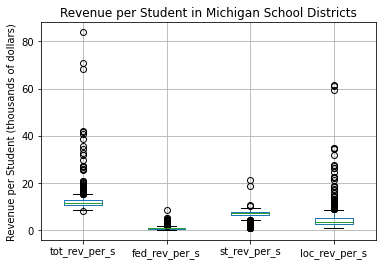

In [22]:
#Boxplots of the different revenue values

b_plt_df = mi_fin_16_clean[['tot_rev_per_s', 'fed_rev_per_s', 'st_rev_per_s', 'loc_rev_per_s']].copy()

b_plt_df.boxplot()

plt.ylabel('Revenue per Student (thousands of dollars)')

plt.title('Revenue per Student in Michigan School Districts')

plt.show()

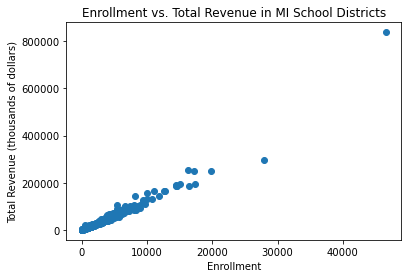

The correlation is 0.97624705627731


In [21]:
#how well does revenue correlate to number of students?

plt.scatter(mi_fin_16_clean['ENROLL'], mi_fin_16_clean['TOTALREV'])

plt.xlabel('Enrollment')
plt.title('Enrollment vs. Total Revenue in MI School Districts')
plt.ylabel('Total Revenue (thousands of dollars)')

plt.show()

r_val = sp.pearsonr(mi_fin_16_clean['ENROLL'], mi_fin_16_clean['TOTALREV'])

print(f'The correlation is {r_val[0]}')

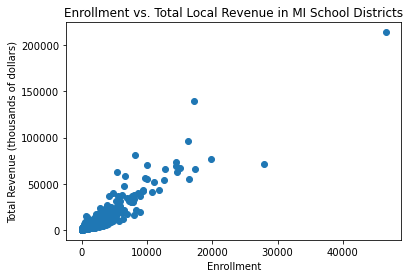

The correlation is 0.9253442142247661


In [20]:
#how well does local revenue correlate to number of students?

plt.scatter(mi_fin_16_clean['ENROLL'], mi_fin_16_clean['TLOCREV'])

plt.xlabel('Enrollment')
plt.title('Enrollment vs. Total Local Revenue in MI School Districts')
plt.ylabel('Total Revenue (thousands of dollars)')

plt.show()

r_val2 = sp.pearsonr(mi_fin_16_clean['ENROLL'], mi_fin_16_clean['TLOCREV'])

print(f'The correlation is {r_val2[0]}')

In [18]:
# try to calculate state revenue for michigan as a safety check
# don't know the values here, but this is very low. 

mi_rev = tstate_rev.sum()

print(mi_rev)

9898623


In [19]:
#Something seems off
#https://www.mlive.com/news/2018/08/see_per-pupil_spending_revenue.html
#looking up DPS revenue from 2016
# this source lists it at about 97 million for 2016:
#https://www.detroitk12.org/cms/lib/MI50000060/Centricity/Domain/5316/DPS%20FY%202017%20Bud%20Amend%20no.2%20Signed%20Resolution.final.pdf
#detroit public schools figure found for elem - secondary ed finance at census website
#documentation lists financials columns as being reported in thousands of dollars

det = mi_fin_16_clean.sort_values(by = ['ENROLL'], ascending = False)

det.head()

,ENROLL,NAME,TOTALREV,TFEDREV,TSTREV,TLOCREV,tot_rev_per_s,fed_rev_per_s,st_rev_per_s,loc_rev_per_s
5836,46616.0,DETROIT PUBLIC SCHOOL DISTRICT,838553,193905,430745,213903,17.988523,4.159623,9.240282,4.588618
5607,27882.0,UTICA COMM SCH DIST,295785,7776,216987,71022,10.608457,0.278890,7.782333,2.547235
5833,19819.0,DEARBORN PUB SCH DIST,251095,20486,153823,76786,12.669408,1.033655,7.761391,3.874363
5851,17321.0,PLYMOUTH-CANTON COMM SCH DIST,193982,3324,124574,66084,11.199238,0.191906,7.192079,3.815253
5821,17233.0,ANN ARBOR CITY SCH DIST 1,250114,6069,104559,139486,14.513666,0.352173,6.067371,8.094122


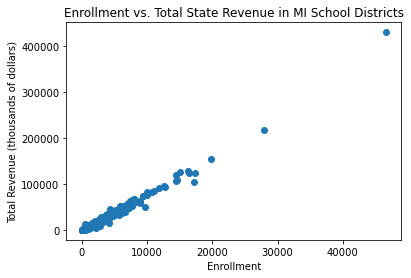

The correlation is 0.9902581911950403


In [23]:
#repeat analysis on state funding
plt.scatter(mi_fin_16_clean['ENROLL'], mi_fin_16_clean['TSTREV'])

plt.xlabel('Enrollment')
plt.title('Enrollment vs. Total State Revenue in MI School Districts')
plt.ylabel('Total Revenue (thousands of dollars)')

plt.show()

r_val3 = sp.pearsonr(mi_fin_16_clean['ENROLL'], mi_fin_16_clean['TSTREV'])

print(f'The correlation is {r_val3[0]}')

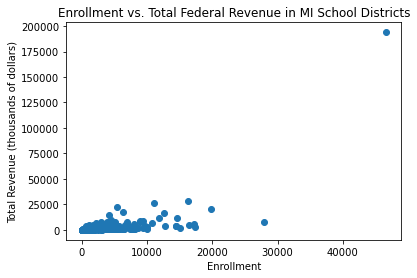

The correlation is 0.6704134870900632


In [24]:
#same thing for federal spending

plt.scatter(mi_fin_16_clean['ENROLL'], mi_fin_16_clean['TFEDREV'])

plt.xlabel('Enrollment')
plt.title('Enrollment vs. Total Federal Revenue in MI School Districts')
plt.ylabel('Total Revenue (thousands of dollars)')

plt.show()

r_val4 = sp.pearsonr(mi_fin_16_clean['ENROLL'], mi_fin_16_clean['TFEDREV'])

print(f'The correlation is {r_val4[0]}')

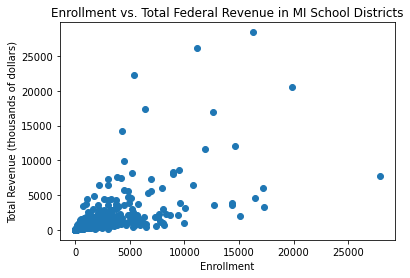

The correlation is 0.6099575824694246


In [25]:
#similar plot with DPS outlier thrown out

repeat = mi_fin_16_clean[mi_fin_16_clean['ENROLL'] < 40000]

plt.scatter(repeat['ENROLL'], repeat['TFEDREV'])

plt.xlabel('Enrollment')
plt.title('Enrollment vs. Total Federal Revenue in MI School Districts')
plt.ylabel('Total Revenue (thousands of dollars)')

plt.show()

r_val5 = sp.pearsonr(repeat['ENROLL'], repeat['TFEDREV'])

print(f'The correlation is {r_val5[0]}')


In [30]:
#Who has most local funding per student?

local_max = mi_fin_16_clean.sort_values(by = ['loc_rev_per_s'], ascending = False)

local_max.head(25)

,ENROLL,NAME,TOTALREV,TFEDREV,TSTREV,TLOCREV,tot_rev_per_s,fed_rev_per_s,st_rev_per_s,loc_rev_per_s
5625,7.0,WELLS TWP SCHOOL DIST,478,27,22,429,68.285714,3.857143,3.142857,61.285714
5364,17.0,WHITEFISH TWP SCH DIST 16,1425,73,316,1036,83.823529,4.294118,18.588235,60.941176
5585,2.0,BOIS BLANC PINES TWP SCH DIST 1,142,17,6,119,71.000000,8.500000,3.000000,59.500000
5351,51.0,BEAVER ISLAND COMM SCHOOL DIST,2133,65,288,1780,41.823529,1.274510,5.647059,34.901961
5554,5.0,GRANT TWP SCH DIST 2,208,22,12,174,41.600000,4.400000,2.400000,34.800000
5297,9.0,ARVON TWP SCH DIST,368,46,14,308,40.888889,5.111111,1.555556,34.222222
5470,15.0,SIGEL TWP SCH DIST 3,513,20,18,475,34.200000,1.333333,1.200000,31.666667
5623,37.0,POWELL TWP SCH DIST 12,1172,51,107,1014,31.675676,1.378378,2.891892,27.405405
5271,31.0,AUTRAIN PUBLIC SCHS,1007,66,100,841,32.483871,2.129032,3.225806,27.129032
5272,25.0,BURT TWP SCH DIST,961,35,268,658,38.440000,1.400000,10.720000,26.320000


In [31]:
#who has most federal funding per student?

fed_max = mi_fin_16_clean.sort_values(by = ['fed_rev_per_s'], ascending = False)

fed_max.head(25)

,ENROLL,NAME,TOTALREV,TFEDREV,TSTREV,TLOCREV,tot_rev_per_s,fed_rev_per_s,st_rev_per_s,loc_rev_per_s
5585,2.0,BOIS BLANC PINES TWP SCH DIST 1,142,17,6,119,71.000000,8.500000,3.000000,59.500000
5297,9.0,ARVON TWP SCH DIST,368,46,14,308,40.888889,5.111111,1.555556,34.222222
5430,148.0,WATERSMEET TWP SCH DIST 6,3839,739,308,2792,25.939189,4.993243,2.081081,18.864865
5562,736.0,GLEN LAKE COMM SCH DIST,13542,3479,1081,8982,18.399457,4.726902,1.468750,12.203804
5554,5.0,GRANT TWP SCH DIST 2,208,22,12,174,41.600000,4.400000,2.400000,34.800000
5364,17.0,WHITEFISH TWP SCH DIST 16,1425,73,316,1036,83.823529,4.294118,18.588235,60.941176
5472,8.0,SIGEL TWP SCH DIST 6,161,34,57,70,20.125000,4.250000,7.125000,8.750000
5836,46616.0,DETROIT PUBLIC SCHOOL DISTRICT,838553,193905,430745,213903,17.988523,4.159623,9.240282,4.588618
5412,5412.0,FLINT CITY SCH DIST,88287,22308,39929,26050,16.313193,4.121951,7.377864,4.813378
5837,1092.0,ECORSE PUBLIC SCHOOLS,17761,4452,9647,3662,16.264652,4.076923,8.834249,3.353480


In [34]:
#spending analysis
#boxplots of total instructional spending per student

total_spend = mi_fin_2016['TOTALEXP'].to_numpy()

tot_spend_per_s = total_spend/enrol

instruc_spend = mi_fin_2016['TCURINST'].to_numpy()

tot_inst_per_s = instruc_spend/enrol

#spending DF

spend_df = mi_fin_2016[['ENROLL', 'NAME', 'TOTALEXP', 'TCURINST']].copy()

spend_df['tot_spend_per_s'] = tot_spend_per_s

spend_df['tot_inst_per_s'] = tot_inst_per_s

spend_df.head()


,ENROLL,NAME,TOTALEXP,TCURINST,tot_spend_per_s,tot_inst_per_s
5270,732.0,ALCONA COMM SCHS,7432,4633,10.153005,6.329235
5271,31.0,AUTRAIN PUBLIC SCHS,982,504,31.677419,16.258065
5272,25.0,BURT TWP SCH DIST,916,435,36.640000,17.400000
5273,673.0,MUNISING CITY SCH DIST 3,7269,4223,10.800892,6.274889
5274,352.0,SUPERIOR CENTRAL SCHOOL DIST,4194,2150,11.914773,6.107955


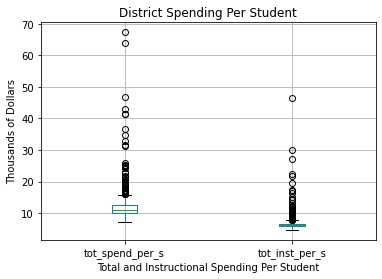

In [36]:
#boxplots of spending

b_plot2 = spend_df[['tot_spend_per_s', 'tot_inst_per_s']].copy()

b_plot2.boxplot()

plt.xlabel('Total and Instructional Spending Per Student')
plt.ylabel('Thousands of Dollars')
plt.title('District Spending Per Student')

plt.show()

In [38]:
#Highest total spenders per student

high_roll = spend_df.sort_values(by = ['tot_spend_per_s'], ascending = False)

high_roll.head(25)

,ENROLL,NAME,TOTALEXP,TCURINST,tot_spend_per_s,tot_inst_per_s
5364,17.0,WHITEFISH TWP SCH DIST 16,1144,380,67.294118,22.352941
5585,2.0,BOIS BLANC PINES TWP SCH DIST 1,128,93,64.000000,46.500000
5554,5.0,GRANT TWP SCH DIST 2,234,150,46.800000,30.000000
5351,51.0,BEAVER ISLAND COMM SCHOOL DIST,2199,1379,43.117647,27.039216
5625,7.0,WELLS TWP SCHOOL DIST,291,136,41.571429,19.428571
5297,9.0,ARVON TWP SCH DIST,373,196,41.444444,21.777778
5272,25.0,BURT TWP SCH DIST,916,435,36.640000,17.400000
5555,557.0,BALDWIN PUBLIC SCH DIST 1,19408,4876,34.843806,8.754039
5455,11.0,ELM RIVER TWP SCH DIST,360,130,32.727273,11.818182
5271,31.0,AUTRAIN PUBLIC SCHS,982,504,31.677419,16.258065


In [39]:
#Highest instructional spenders per student
high_inst = spend_df.sort_values(by = ['tot_inst_per_s'], ascending = False)

high_inst.head(25)

,ENROLL,NAME,TOTALEXP,TCURINST,tot_spend_per_s,tot_inst_per_s
5585,2.0,BOIS BLANC PINES TWP SCH DIST 1,128,93,64.000000,46.500000
5554,5.0,GRANT TWP SCH DIST 2,234,150,46.800000,30.000000
5351,51.0,BEAVER ISLAND COMM SCHOOL DIST,2199,1379,43.117647,27.039216
5364,17.0,WHITEFISH TWP SCH DIST 16,1144,380,67.294118,22.352941
5297,9.0,ARVON TWP SCH DIST,373,196,41.444444,21.777778
5625,7.0,WELLS TWP SCHOOL DIST,291,136,41.571429,19.428571
5272,25.0,BURT TWP SCH DIST,916,435,36.640000,17.400000
5623,37.0,POWELL TWP SCH DIST 12,1156,633,31.243243,17.108108
5271,31.0,AUTRAIN PUBLIC SCHS,982,504,31.677419,16.258065
5563,159.0,NORTHPORT SCH DIST 1,4131,2396,25.981132,15.069182


In [40]:
#lowest instructional spending per student

high_inst.tail(25)

,ENROLL,NAME,TOTALEXP,TCURINST,tot_spend_per_s,tot_inst_per_s
5591,1891.0,ARMADA AREA SCH DIST,19253,10336,10.181386,5.465891
5304,2511.0,BANGOR TWP SCH DIST,23217,13703,9.246117,5.457188
5613,302.0,BEAR LAKE SCHOOLS,3060,1647,10.132450,5.453642
5646,1023.0,MC BAIN RURAL AGR SCHOOL DIST,9405,5575,9.193548,5.449658
5396,882.0,POTTERVILLE PUBLIC SCH DIST,10995,4791,12.465986,5.431973
5602,1283.0,NEW HAVEN COMM SCH DIST,15210,6967,11.855027,5.430242
5522,488.0,CLIMAX SCOTTS COMM SCH DIST,5225,2638,10.706967,5.405738
5813,884.0,GOBLES PUBLIC SCH DIST 20,10604,4769,11.995475,5.394796
5460,170.0,STANTON TWP SCH DIST,1443,917,8.488235,5.394118
5493,1896.0,LAKEWOOD SCH DIST 3,18215,10162,9.607068,5.359705


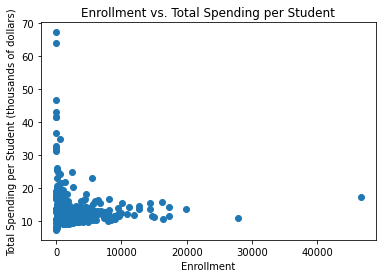

The correlation is -0.03260296237735669


In [41]:
#How does total spending per student relate to enrollment?

plt.scatter(spend_df['ENROLL'], spend_df['tot_spend_per_s'])

plt.xlabel('Enrollment')
plt.title('Enrollment vs. Total Spending per Student')
plt.ylabel('Total Spending per Student (thousands of dollars)')

plt.show()

r_val6 = sp.pearsonr(spend_df['ENROLL'], spend_df['tot_spend_per_s'])

print(f'The correlation is {r_val6[0]}')

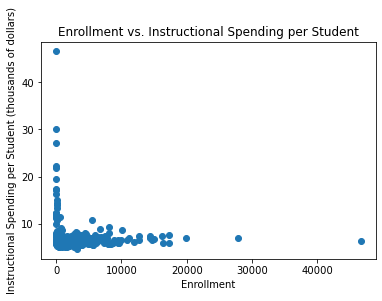

The correlation is -0.06452596046785788


In [42]:
#How does instructional spending per student relate to enrollment?

plt.scatter(spend_df['ENROLL'], spend_df['tot_inst_per_s'])

plt.xlabel('Enrollment')
plt.title('Enrollment vs. Instructional Spending per Student')
plt.ylabel('Instructional Spending per Student (thousands of dollars)')

plt.show()

r_val7 = sp.pearsonr(spend_df['ENROLL'], spend_df['tot_inst_per_s'])

print(f'The correlation is {r_val7[0]}')